In [22]:
# Jordan Marshall - 18256716 | Marcin Sek - 18254187
# [Runs without error]
# [Link to original code if used]

In [29]:
import pandas as pd

dataset = pd.read_csv(
    "star_dataset.csv",
    names=["Temperature", "Luminosity", "Radius", "Absolute_Magnitude", "Star_Type", "Star_Color", "Spectral_Class"],
    header=1
)
dataset.head()
print(dataset)

     Temperature     Luminosity     Radius  Absolute_Magnitude  Star_Type  \
0           3042       0.000500     0.1542               16.60          0   
1           2600       0.000300     0.1020               18.70          0   
2           2800       0.000200     0.1600               16.65          0   
3           1939       0.000138     0.1030               20.06          0   
4           2840       0.000650     0.1100               16.98          0   
..           ...            ...        ...                 ...        ...   
234        38940  374830.000000  1356.0000               -9.93          5   
235        30839  834042.000000  1194.0000              -10.63          5   
236         8829  537493.000000  1423.0000              -10.73          5   
237         9235  404940.000000  1112.0000              -11.23          5   
238        37882  294903.000000  1783.0000               -7.80          5   

    Star_Color Spectral_Class  
0          Red              M  
1          

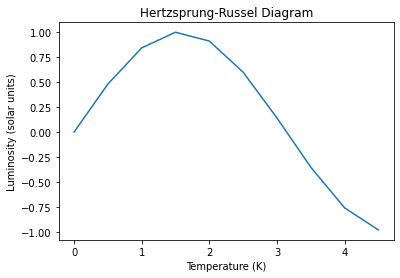

In [34]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

def plotDataset():
    """ Generates a Hertzsprung-Russell Diagram of the Dataset """
    plt.title("Hertzsprung-Russel Diagram")
    plt.xlabel("Temperature (K)")
    plt.ylabel("Luminosity (solar units)")

    # Parse data in dataset
    x = np.arange(0, 5, 0.1)
    y = np.sin(x)
    plt.plot(x, y)

    # Display graph
    plt.show()

    pass

plotDataset()

In [25]:
import numpy as np

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

def createModel():
    pass

def predict():
    pass

def trainModel():
    pass

def plotModel():
    pass